# 2 - Processing the data from Google Earth

##### Import

In [1]:
import sys, mplstereonet
sys.path.append(r"..")  # append local path to access rgeomod module
import rgeomod

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 2.1 - Load Google Earth's .kml files

In [2]:
folder_path = "../data/FW2/"
ks, ks_names, ks_bool = rgeomod.read_kml_files(folder_path)

read kml
1 point sets added
01_Unit_1.kml


read kml
16 point sets added
Dips.kml


read kml
1 point sets added
02_Unit_2.kml


read kml
1 point sets added
04_Unit_4.kml


read kml
1 point sets added
03_Unit_3.kml




*ks* contains the KmlPoints objects, containing the point data from the respective .kml files in the given directory:

In [3]:
ks

*ks_names* contains the filenames:

In [4]:
ks_names

['01_Unit_1', 'Dips', '02_Unit_2', '04_Unit_4', '03_Unit_3']

*ks_bool* is a boolean array specifying which object contains dip values:

In [5]:
ks_bool

array([False,  True, False, False, False], dtype=bool)

## 2.2 - Get elevation data from Digital Elevation Model (DTM)

In [6]:
geotiff_filepath = "../data/dome_sub_sub_utm.tif"

In [7]:
rgeomod.get_elevation_from_dtm(ks, geotiff_filepath)

Extracting elevation data: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

Elevation data successfully extracted from DTM.


## 2.3 - Fit planes to point sets

In [8]:
rgeomod.fit_planes_to_points(ks)

Fitting planes to point sets: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

Planes successfully fit to point sets.


## 2.4 - Convert data into readable DataFrames

In [9]:
interfaces, foliations = rgeomod.convert_to_df(ks, ks_names, ks_bool)

In [10]:
interfaces.tail()

,X,Y,Z,formation,series
83,615922.169316,2.474135e+06,454.0,03_Unit_3,Default series
84,615683.518010,2.473714e+06,345.0,03_Unit_3,Default series
85,615265.970585,2.473812e+06,431.0,03_Unit_3,Default series
86,614808.750515,2.473884e+06,374.0,03_Unit_3,Default series
87,614534.355744,2.474193e+06,419.0,03_Unit_3,Default series


In [11]:
foliations.tail()

,X,Y,Z,dip,azimuth,polarity,formation,series
11,617537.992479,2.479068e+06,461.875000,34.497184,349.883630,1,01_Unit_1,Default series
12,619683.550025,2.478926e+06,469.375000,65.801180,43.522475,1,01_Unit_1,Default series
13,620183.977449,2.478372e+06,467.900000,40.755717,53.592270,1,01_Unit_1,Default series
14,617105.587985,2.475285e+06,602.000000,32.487338,148.738537,1,01_Unit_1,Default series
15,618645.592616,2.476287e+06,575.714286,19.157720,117.215020,1,01_Unit_1,Default series


## 2.5 - Visualize the data

### 2.5.1 - 3D Point Cloud

Text(0.5,0.98,'GoogleEarth picks')

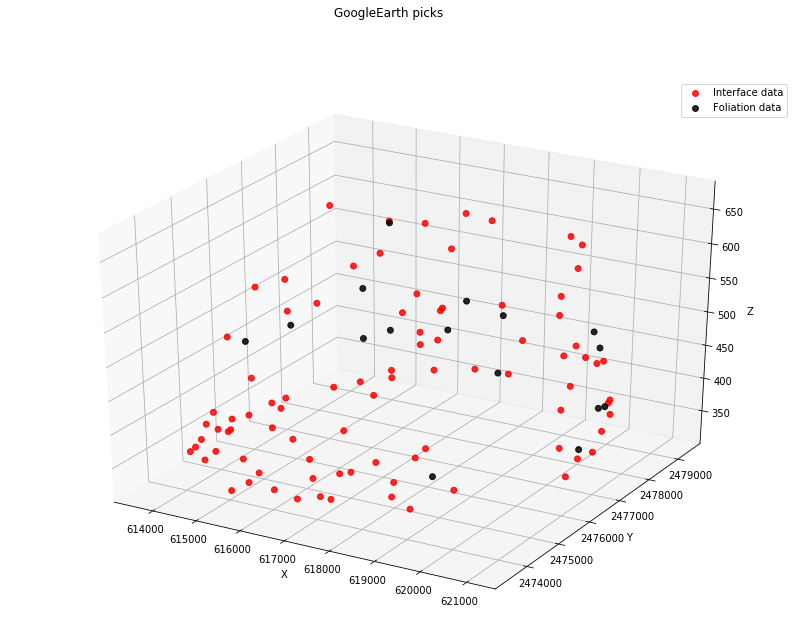

In [12]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(interfaces["X"], interfaces["Y"], interfaces["Z"], color="red", alpha=0.85, s=35, label="Interface data")
ax.scatter(foliations["X"], foliations["Y"], foliations["Z"], color="black", alpha=0.85, s=35, label="Foliation data")

ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.suptitle("GoogleEarth picks")

Plot histograms of the extracted dip and dip direction data

### 2.5.2 - Histograms

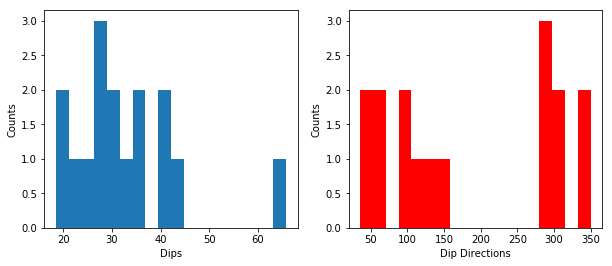

In [13]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(foliations["dip"], 18)
ax1.set_xlabel("Dips")
ax1.set_ylabel("Counts")

ax2.hist(foliations["azimuth"], 18, color='r');
ax2.set_xlabel("Dip Directions")
ax2.set_ylabel("Counts");

### 2.5.3 - Stereonet plots

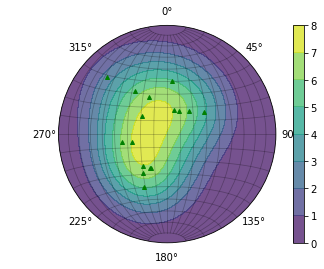

In [14]:
fig, ax = mplstereonet.subplots()
cax = ax.density_contourf(foliations["azimuth"], foliations["dip"], measurement='poles', cmap='viridis', alpha=0.75)
fig.colorbar(cax)
ax.pole(foliations["azimuth"], foliations["dip"], 'g^', markersize=4)
ax.grid(True, color="black", alpha=0.25)

plt.show()

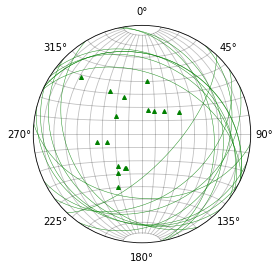

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')
ax.pole(foliations["azimuth"], foliations["dip"], 'g^', markersize=4)
ax.plane(foliations["azimuth"], foliations["dip"], 'g-', linewidth=0.5, alpha=0.85)
ax.grid(True, color="black", alpha=0.25)

## 2.6 - Save data to .csv files

In [16]:
interfaces.to_csv("../data/gempy_interfaces.csv", index=False)
foliations.to_csv("../data/gempy_foliations.csv", index=False)